In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import pearsonr
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from pylab import rcParams
import matplotlib.ticker as mt
from matplotlib.ticker import ScalarFormatter

<a id='top'></a>
# World Food Programme: food price and affordability analysis
#### Data understanding and preparation
### [The World Bank: GDP per capita by country ](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD) 

#### [Data understanding](#understanding)

#### [Data wrangling](#wrangling)

#### [Data cleaning](#cleaning)

#### [Distribution analysis](#distribution)

<a id='understanding'></a>
### Data understanding
[Back to top](#top)

In [3]:
path=r'C:\Users\frauz\Documents\Python Projects\Final Project\Data' #creating a path
df_gdp=pd.read_csv(os.path.join(path,'world_bank_gdp_per_capita.csv'),index_col=False) #importing data

In [4]:
df_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30918.515220,31902.762580,24487.863570,29342.100730,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.423775,112.503866,118.197351,122.774120,131.163760,137.809818,...,2153.766138,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158


In [5]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            132 non-null    float64
 5   1961            134 non-null    float64
 6   1962            136 non-null    float64
 7   1963            136 non-null    float64
 8   1964            136 non-null    float64
 9   1965            147 non-null    float64
 10  1966            150 non-null    float64
 11  1967            153 non-null    float64
 12  1968            158 non-null    float64
 13  1969            158 non-null    float64
 14  1970            167 non-null    float64
 15  1971            170 non-null    float64
 16  1972            170 non-null    float64
 17  1973            170 non-null    flo

In [6]:
df_gdp.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,132.000000,134.000000,136.000000,136.000000,136.000000,147.000000,150.000000,153.000000,158.000000,158.000000,...,259.000000,260.000000,258.000000,258.000000,258.000000,258.000000,257.000000,257.000000,251.000000,233.000000
mean,478.245321,493.774294,516.883860,548.000394,594.872016,655.668380,711.345288,726.808306,741.932065,803.586211,...,16777.410719,17091.447114,15430.499300,15749.246834,16547.307875,17529.056491,17485.308803,16255.757302,18254.306724,16380.937288
std,616.714505,639.747701,669.458248,708.720195,775.476275,853.254079,925.266593,958.125609,985.276397,1062.335529,...,25390.375324,25953.641044,23378.243557,23691.920501,24490.942300,26084.903445,25871.873146,24509.970504,28341.600973,22531.018771
min,40.119192,26.318449,26.983496,28.434172,20.018579,16.577652,12.786964,12.900238,20.395642,20.682296,...,241.547666,257.818557,289.359627,242.539527,244.145422,232.060617,216.972971,216.827417,221.157803,238.441876
25%,107.016335,110.833911,115.534190,122.672420,126.403711,142.215208,147.499600,156.805047,161.612574,165.298202,...,2083.374233,2154.323244,2050.161095,2046.494888,2116.825558,2202.316516,2235.391816,2161.310201,2382.547674,2272.454739
50%,219.083126,200.154785,208.098109,218.862254,237.909759,253.309059,266.235090,252.252422,294.015287,295.588108,...,6755.073675,6904.585446,6192.524350,6131.052349,6443.380318,6929.961232,6955.881770,6327.598962,7060.897609,6908.802119
75%,475.644662,505.823091,549.014749,590.655151,650.826733,693.264427,778.286904,775.152812,772.135290,827.819821,...,19792.134135,20277.795912,18210.355075,18688.787632,20264.313783,22064.836570,23219.409050,19551.621160,21431.516260,20018.515150
max,3007.123445,3066.562869,3243.843078,3374.515171,3573.941185,4081.424500,4228.745378,4336.426587,4695.923390,5032.144743,...,185055.487400,195772.673000,170338.600400,174606.493800,173611.784300,194287.093300,199382.781200,182537.304600,234317.084800,126426.089900


<a id='wrangling'></a>
### Data wrangling
[Back to top](#top)

In [7]:
# Dropping unnecessary columns

df_gdp=df_gdp.drop(columns=['Indicator Name','Indicator Code'])

In [8]:
df_gdp.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30918.515220,31902.762580,24487.863570,29342.100730,NaN
1,Africa Eastern and Southern,AFE,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,207.945574,210.149894,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720
2,Afghanistan,AFG,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,...,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN
3,Africa Western and Central,AFW,107.423775,112.503866,118.197351,122.774120,131.163760,137.809818,143.601581,128.049650,...,2153.766138,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158


In [9]:
# Unpivoting the data

df_gdp=pd.melt(df_gdp,id_vars=['Country Name','Country Code'], var_name='year', value_name='gdp_pcapita')
df_gdp.head()

,Country Name,Country Code,year,gdp_pcapita
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,161.638982
2,Afghanistan,AFG,1960,62.369375
3,Africa Western and Central,AFW,1960,107.423775
4,Angola,AGO,1960,NaN


In [10]:
# Renaming the columns

df_gdp.rename(columns={'Country Name':'country','Country Code':'iso'}, inplace=True)

In [11]:
# Checking data types

df_gdp.dtypes

country         object
iso             object
year            object
gdp_pcapita    float64
dtype: object

In [12]:
# Changing year to integer to enable future merging with other data sets

df_gdp=df_gdp.astype({'year':'int'})
df_gdp.dtypes

country         object
iso             object
year             int32
gdp_pcapita    float64
dtype: object

In [13]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      16758 non-null  object 
 1   iso          16758 non-null  object 
 2   year         16758 non-null  int32  
 3   gdp_pcapita  13365 non-null  float64
dtypes: float64(1), int32(1), object(2)
memory usage: 458.4+ KB


In [14]:
df_gdp.describe()

,year,gdp_pcapita
count,16758.000000,13365.000000
mean,1991.000000,8403.025438
std,18.184785,16823.777596
min,1960.000000,12.786964
25%,1975.000000,565.809775
50%,1991.000000,1916.255899
75%,2007.000000,7805.611873
max,2022.000000,234317.084800


<a id='cleaning'></a>
### Data cleaning
[Back to top](#top)

In [15]:
# The data set covers a time period of more than 60 years. There are quite a high number of missing values for some of them 

df_gdp.isnull().sum()

country           0
iso               0
year              0
gdp_pcapita    3393
dtype: int64

In [16]:
# Removing the time period 1960-1989 that won't be used in the further analysis
remove_years=list(range(1960,1990))
print(remove_years)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]


In [18]:
df_gdpc=df_gdp.drop(df_gdp[df_gdp['year'].isin(remove_years)].index) # removing the chosen years
df_gdpc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8778 entries, 7980 to 16757
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      8778 non-null   object 
 1   iso          8778 non-null   object 
 2   year         8778 non-null   int32  
 3   gdp_pcapita  8202 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 240.2+ KB


In [20]:
df_gdpc.isnull().sum() # Remaining missing values will be addressed later when this dataset will be merged with others

country          0
iso              0
year             0
gdp_pcapita    576
dtype: int64

In [21]:
# Checking for duplicates 

df_gdpc.duplicated().value_counts() # no duplicated detected

False    8778
dtype: int64

<a id='understanding'></a>
### Data Distribution
[Back to top](#top)

<Axes: >

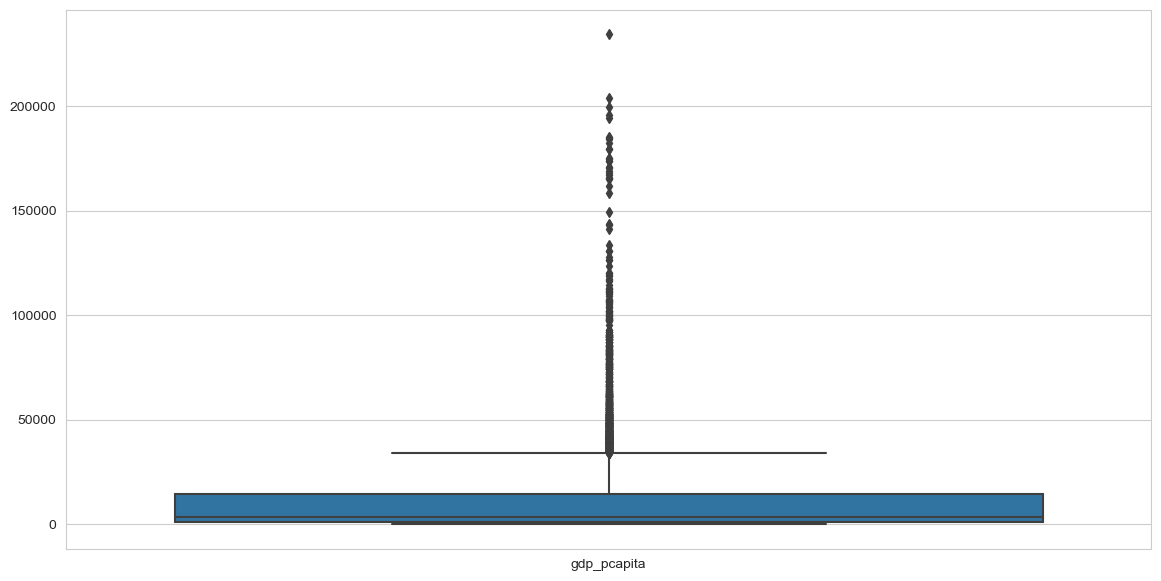

In [24]:
# Plotting  data distribution

%matplotlib inline
rcParams['figure.figsize']=14,7
sns.set_style('whitegrid')

sns.boxplot(data=df_gdpc[['gdp_pcapita']])

In [26]:
# Verifying inflation values

df_gdpc.loc[df_gdpc['gdp_pcapita'].idxmax()] # the value is accurate

country             Monaco
iso                    MCO
year                  2021
gdp_pcapita    234317.0848
Name: 16375, dtype: object

In [27]:
# Verifying the minimum population value

df_gdpc.loc[df_gdpc['gdp_pcapita'].idxmin()] # the value is accurate

country             Iraq
iso                  IRQ
year                1991
gdp_pcapita    22.850371
Name: 8359, dtype: object

In [28]:
# Exporting the data for further analysis

df_gdpc.to_pickle(os.path.join(path,'Data Prepared','gdp_per_capita.pkl'))